In [1]:
# Data preparation for Ph.D thesis
# @author: Andres L. Suarez-Cetrulo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

#Alpha Vantage API to download 15 days of minute data (only if required)
from alpha_vantage.timeseries import TimeSeries
apikey='E8HE93TKWNLCACEU'
ts = TimeSeries(key=apikey)

# Using TALib abstract API to create a dictionary of technical indicators to iterate later.
from talib import abstract

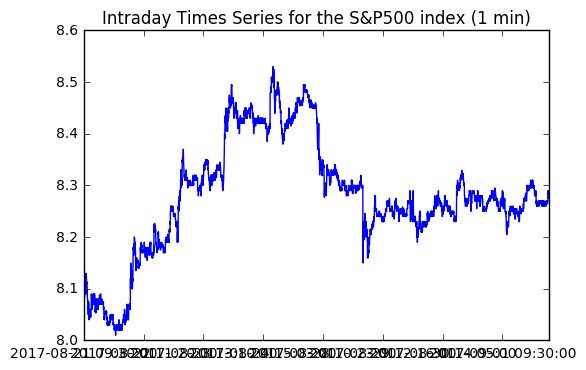

In [2]:
# ###############################################
# IMPORTANT! Only run if we need to download data / print de new trend
# ###############################################

# Get pandas object with the intraday data and another with the call's metadata
ts = TimeSeries(key=apikey, output_format='pandas')
data1, meta_data = ts.get_intraday('S&P500', interval='1min', outputsize='full')
csv_path="/home/cetrulin/Desktop/Andres/data/raw/S&P500/S&P500_"+str(datetime.date.today())+".csv"

# Print closing price trend
data1['close'].plot() #this way the dates appear
plt.title('Intraday Times Series for the S&P500 index (1 min)')
plt.show()

# Save dataframe in a csv 
data1.to_csv(csv_path, sep='\t', encoding='utf-8')
# ###############################################


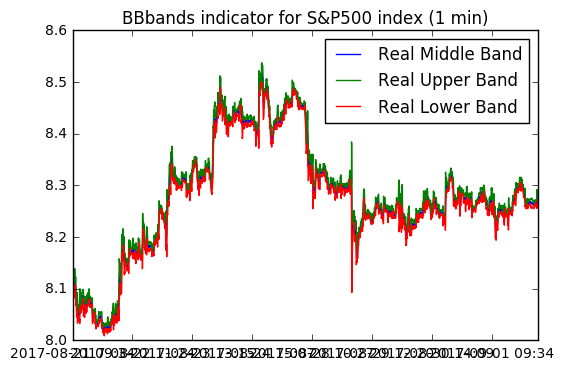

In [3]:
# ###############################################

# Example of how to use Technical Indicators directly from Alpha Vantage
from alpha_vantage.techindicators import TechIndicators

ti = TechIndicators(key='E8HE93TKWNLCACEU', output_format='pandas')
data, meta_data = ti.get_bbands(symbol='S&P500', interval='1min', time_period=5)
data.plot()
plt.title('BBbands indicator for S&P500 index (1 min)')
plt.show()

# e.g. rsi
#tmp_data, tmp_meta_data = ti.get_rsi(symbol='S&P500', interval='5min', time_period=200)

# Not used aiming a more general approach which scripts were able to be used with data of other sources.
# ###############################################


In [4]:
# example path: "/home/cetrulin/Desktop/Andres/data/APPL/AAPL_prices_sample.csv"
csv_path="/home/cetrulin/Desktop/Andres/data/raw/S&P500/S&P500_"+str(datetime.date.today())+".csv"
# csv_path="/home/cetrulin/Desktop/Andres/data/raw/S&P500/S&P500_2017-08-27.csv"

df=pd.read_csv(csv_path, sep='\t', parse_dates=True,infer_datetime_format=True)

#df.drop also drops the selected column (if value=1) or rows (if =0)
#df = df.drop(df.columns[[0]], 1)
#df = df.drop('symbol', 1)

# Label columns
df.columns = ['date','low','close','open','high','volume']
#df

In [5]:
#Add parameters to transform in TS
timeseries=['low','close','open','high','volume']
#Length of the TS. How many values do we keep per serie. 
# e.g. 1 -> t / 2 -> t,t-1 / 3 -> t,t-1,t-2 / 4 -> t,t-1,t-2,t-3
length = 4

# Add lagged times
for column in timeseries:
    #df[column+'_t']=df[column]
    for i in range(1,length):
        df[column+'_t-'+str(i)]=df[column].shift(i) #it could also be sorted and group by if needed
    #del drops the delected df column
    #del df[column]

In [6]:
# Creating a dictionary of technical indicators using TALib abstract API
indicator = {}
# Add as many indicators as necessary: see all indicators in https://mrjbq7.github.io/ta-lib/
indicator['sma']=abstract.Function('sma')
indicator['rsi']=abstract.Function('rsi')
indicator['adx']=abstract.Function('adx')
indicator['cci']=abstract.Function('cci')
indicator['aroon']=abstract.Function('aroon')
indicator['bbands']=abstract.Function('bbands')
indicator['willr']=abstract.Function('willr')
indicator['macd']=abstract.Function('macd')
indicator['stoch']=abstract.Function('stoch')
indicator['ad']=abstract.Function('ad')
indicator['obv']=abstract.Function('obv')

# Show the descriptions
#for ind in list(indicator.values()):
#    print('===============================')
#    print(ind)
#    print('===============================')
#    print()


In [7]:
# ###########################################
# Iterate and run list of indicators selected
# All of them produced for 25 prior mins of data 
# ###########################################
for key in list(indicator.keys()):
    key_output=indicator[key](df, timeperiod=25) #, price='close')
    
    # For indicators that only return one column (this will need to be modified depending on the selection of indicators)
    if key not in ['bbands','aroon','stoch','macd']:
        df[key]=indicator[key](df, timeperiod=25) 
    # Otherwise check the list of columns and return all
    else: 
        for j in range(0,len(list(key_output.columns))):
            df[key+'_'+key_output.columns[j]]=key_output[[j]]

df

,date,low,close,open,high,volume,low_t-1,low_t-2,low_t-3,close_t-1,...,bbands_upperband,bbands_middleband,bbands_lowerband,ad,rsi,macd_macd,macd_macdsignal,macd_macdhist,obv,willr
0,2017-08-21 09:30:00,8.1000,8.0900,63608.0,8.0900,8.1000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.1000,NaN
1,2017-08-21 09:31:00,8.1000,8.0800,7359.0,8.0850,8.1000,8.1000,NaN,NaN,8.0900,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN
2,2017-08-21 09:32:00,8.1000,8.0850,13621.0,8.0850,8.0882,8.1000,8.1000,NaN,8.0800,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.0882,NaN
3,2017-08-21 09:33:00,8.0800,8.0700,7264.0,8.0700,8.0800,8.1000,8.1000,8.1000,8.0850,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0082,NaN
4,2017-08-21 09:34:00,8.0900,8.0600,61796.0,8.0900,8.0700,8.0800,8.1000,8.1000,8.0700,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-8.0618,NaN
5,2017-08-21 09:35:00,8.1000,8.0839,14471.0,8.0850,8.0839,8.0900,8.0800,8.1000,8.0600,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0221,NaN
6,2017-08-21 09:36:00,8.0900,8.0800,5747.0,8.0850,8.0900,8.1000,8.0900,8.0800,8.0839,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-8.0679,NaN
7,2017-08-21 09:37:00,8.0900,8.0850,500.0,8.0850,8.0850,8.0900,8.1000,8.0900,8.0800,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0171,NaN
8,2017-08-21 09:38:00,8.1000,8.0850,8137.0,8.1000,8.0850,8.0900,8.0900,8.1000,8.0850,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0171,NaN
9,2017-08-21 09:39:00,8.1057,8.0910,33218.0,8.0950,8.0950,8.1000,8.0900,8.0900,8.0850,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.1121,NaN


In [8]:
# Creating label/y to be predicted

# Ten minutes ahead cloasing price as value y to predict
df['close_t+10']=df['close'].shift(-10)

In [9]:
# Filtering out first 50 mins of the day and last 10 minutes, 
# as they will have NaN values in either features or label (10 mins ahead)
# The last hour is not normally good for buying as we shouldn't keep nothing open by end of business.
# The first half an hour may not be great for training as there is a lot of factors coming from the 
#  European and Asian markets having impacting the results, more than in the rest of the day.

# Not between 09:30 and 10:20am and not from 5:50pm onwards
excluded_times=['09:3','09:4','09:5','10:0','10:1','15:5','16:0']
#df.date.str[11:15]
# Not between 09:30 and 10:20am (lack of prior times in TS and indicators) and not from 5:50pm onwards (lack of label)
df=df[~df.date.str[11:15].isin(excluded_times)]
#df['date'].between_time('09:00','10:00') #didn't work/check

In [10]:
len(df.columns)

39

In [11]:
# preview
df

,date,low,close,open,high,volume,low_t-1,low_t-2,low_t-3,close_t-1,...,bbands_middleband,bbands_lowerband,ad,rsi,macd_macd,macd_macdsignal,macd_macdhist,obv,willr,close_t+10
50,2017-08-21 10:20:00,8.0650,8.0600,7800.0,8.0600,8.0600,8.0600,8.0600,8.0600,8.0450,...,8.064756,8.031876,0.0,46.512946,-0.008576,-0.008854,0.000278,-32.2539,-100.000000,8.0500
51,2017-08-21 10:21:00,8.0600,8.0600,100.0,8.0600,8.0600,8.0650,8.0600,8.0600,8.0600,...,8.063156,8.033563,0.0,46.512946,-0.007547,-0.008593,0.001045,-32.2539,-100.000000,8.0550
52,2017-08-21 10:22:00,8.0505,8.0400,6930.0,8.0436,8.0505,8.0600,8.0650,8.0600,8.0600,...,8.061156,8.032342,0.0,41.397419,-0.008251,-0.008524,0.000274,-40.3044,-122.826087,8.0550
53,2017-08-21 10:23:00,8.0460,8.0400,10582.0,8.0450,8.0409,8.0505,8.0600,8.0650,8.0400,...,8.059156,8.031720,0.0,41.397419,-0.008708,-0.008561,-0.000147,-40.3044,-111.881188,8.0700
54,2017-08-21 10:24:00,8.0500,8.0400,9873.0,8.0500,8.0400,8.0460,8.0505,8.0600,8.0400,...,8.057156,8.031794,0.0,41.397419,-0.008966,-0.008642,-0.000325,-40.3044,-117.647059,8.0850
55,2017-08-21 10:25:00,8.0500,8.0450,1300.0,8.0500,8.0500,8.0500,8.0460,8.0505,8.0400,...,8.055756,8.031766,0.0,43.163735,-0.008668,-0.008647,-0.000021,-32.2544,-102.941176,8.0700
56,2017-08-21 10:26:00,8.0500,8.0450,200.0,8.0500,8.0450,8.0500,8.0500,8.0460,8.0450,...,8.054356,8.032171,0.0,43.163735,-0.008336,-0.008585,0.000249,-32.2544,-102.941176,8.0700
57,2017-08-21 10:27:00,8.0500,8.0450,15335.0,8.0450,8.0487,8.0500,8.0500,8.0500,8.0450,...,8.053240,8.032117,0.0,43.163735,-0.007980,-0.008464,0.000484,-32.2544,-103.344482,8.0700
58,2017-08-21 10:28:00,8.0500,8.0400,9700.0,8.0450,8.0500,8.0500,8.0500,8.0500,8.0450,...,8.052040,8.031461,0.0,41.741707,-0.008010,-0.008373,0.000363,-40.3044,-120.066890,8.0600
59,2017-08-21 10:29:00,8.0500,8.0400,13298.0,8.0500,8.0500,8.0500,8.0500,8.0500,8.0400,...,8.050840,8.031108,0.0,41.741707,-0.007942,-0.008287,0.000345,-40.3044,-120.689655,8.0600


In [12]:
# Export processed data
output_csv_path="/home/cetrulin/Desktop/Andres/data/analysis/S&P500/S&P500_"+str(datetime.date.today())+"_indicators.csv"
df.to_csv(output_csv_path, sep=';', encoding='utf-8')
